In [1]:
!pip install -Uq langchain langchain-openai langgraph

In [ ]:
import os
from langchain_openai import AzureChatOpenAI
os.environ["OPENAI_API_VERSION"] = "api_version"
os.environ["AZURE_OPENAI_ENDPOINT"] = "endpoint"
os.environ["AZURE_OPENAI_API_KEY"] = "api_key"

os.environ['LANGSMITH_TRACING'] ='true'
os.environ['LANGSMITH_ENDPOINT']='https://api.smith.langchain.com'
os.environ['LANGSMITH_API_KEY']='langsmith_key'
os.environ['LANGSMITH_PROJECT']='cohort-3-langgraph'

os.environ["PINECONE_API_KEY"]='pinecone_key'

In [3]:
llm = AzureChatOpenAI(
  deployment_name = "gpt-4.1",
  temperature=1,
  top_p=0.8
)

llm.invoke('hello')

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzFiQ6dttY7XG1jtWjk9VsFdQ6uoN', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcf98-c18d-7fc2-83a6-46829d98bf7c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
def node1(input_query):
  response = llm.invoke(input_query)
  return response.content

def node2(input_query):
  return input_query.upper()

In [5]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(str)

workflow.add_node("llm", node1)
workflow.add_node("upper", node2)

workflow.add_edge(START, "llm")
workflow.add_edge("llm", "upper")
workflow.add_edge("upper", END)

graph = workflow.compile()


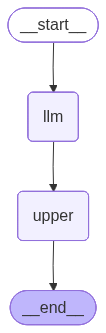

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [7]:
graph.invoke("Explain Langgraph in one line.")

'LANGGRAPH IS AN OPEN-SOURCE FRAMEWORK FOR BUILDING STATEFUL, MULTI-AGENT WORKFLOWS USING GRAPHS ON TOP OF LANGCHAIN.'

In [9]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph.message import add_messages

In [10]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    response: str

In [38]:
def node1(state):
  print(state)
  input_query = state['messages'][-1]
  response = llm.invoke(state['messages'])
  return {'messages': [response]}

def node2(state):
  print(state)
  input_query = state['messages'][-1]
  return {'messages': [input_query.content.upper()], 'response': input_query.content.upper()}

In [39]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("llm", node1)
workflow.add_node("upper", node2)

workflow.add_edge(START, "llm")
workflow.add_edge("llm", "upper")
workflow.add_edge("upper", END)

graph = workflow.compile()

In [29]:
response = graph.invoke({
  'messages': ['ai agents in 1 sentence'],
  'response': ""
})

{'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e60d0370-6a6c-4be5-8b61-2c6b73dd4720')], 'response': ''} 
 {'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e60d0370-6a6c-4be5-8b61-2c6b73dd4720'), AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzG4182WqrCx207MWRwQiPDqRkSit', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfad-2f75-7f40-9f96-8abafc86a45c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})], 'response': ''}

In [31]:
graph.invoke({
  'messages': ['give me 5 uses for the same'],
  'response': ""
})

{'messages': [HumanMessage(content='give me 5 uses for the same', additional_kwargs={}, response_metadata={}, id='dbbc1f8e-ff76-453a-bab0-e060ebfbf9cd')], 'response': ''} 
 {'messages': [HumanMessage(content='give me 5 uses for the same', additional_kwargs={}, response_metadata={}, id='dbbc1f8e-ff76-453a-bab0-e060ebfbf9cd'), AIMessage(content='Certainly! However, you mentioned **"the same"**—could you clarify what object, concept, or topic you are referring to? This will help me provide five relevant uses. Please specify, and I\'ll be happy to assist!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 15, 'total_tokens': 63, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGCm64fLCBZZrEXgDd105jP4YEam', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfb5-7aac-7bf2-9999-dbd120a438bf-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 15, 'output_tokens': 48, 'total_tokens': 63, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})], 'response': ''} {'messages': [HumanMessage(content='give me 5 uses for the same', additional_kwargs={}, response_metadata={}, id='dbbc1f8e-ff76-453a-bab0-e060ebfbf9cd'),
 AIMessage(content='Certainly! However, you mentioned **"the same"**—could you clarify what object, concept, or topic you are referring to? This will help me provide five relevant uses. Please specify, and I\'ll be happy to assist!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 15, 'total_tokens': 63, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGCm64fLCBZZrEXgDd105jP4YEam', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfb5-7aac-7bf2-9999-dbd120a438bf-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 15, 'output_tokens': 48, 'total_tokens': 63, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning

In [40]:
from langgraph.checkpoint.memory import InMemorySaver  
checkpointer = InMemorySaver()  

graph = workflow.compile(checkpointer=checkpointer)  

In [41]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({
  'messages': ['ai agents in 1 sentence'],
  'response': ""
}, config)

{'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35')], 'response': ''} 
 {'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35'), AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGNka77ZsLwnxGQOvAquq3bh23Rz', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfbf-db2a-7931-87af-155e68403496-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})], 'response': ''} {'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35'),
 AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGNka77ZsLwnxGQOvAquq3bh23Rz', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfbf-db2a-7931-87af-155e68403496-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='AI AGENTS ARE AUTONOMOUS SYSTEMS THAT PERCEIVE THEIR ENVIRONMENT, MAKE DECISIONS, AND TAKE ACTIONS TO ACHIEVE SPECIFIC GOALS.', additional_kwargs={}, re

In [42]:
response = graph.invoke({
  'messages': ['give me 5 uses for the same'],
  'response': ""
}, config)

{'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35'), AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGNka77ZsLwnxGQOvAquq3bh23Rz', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfbf-db2a-7931-87af-155e68403496-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='AI AGENTS ARE AUTONOMOUS SYSTEMS THAT PERCEIVE THEIR ENVIRONMENT, MAKE DECISIONS, AND TAKE ACTIONS TO ACHIEVE SPECIFIC GOALS.', additional_kwargs={}, response_metadata={}, id='3f04d690-a46a-4e5e-a8ed-a3485813acad'), HumanMessage(content='give me 5 uses for the same', additional_kwargs={}, response_metadata={}, id='aea654a4-2c1e-44bd-9347-7792dccab5fa')], 'response': ''} 
 {'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35'), AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGNka77ZsLwnxGQOvAquq3bh23Rz', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfbf-db2a-7931-87af-155e68403496-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details

In [44]:
response['messages']

[HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35'),
 AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGNka77ZsLwnxGQOvAquq3bh23Rz', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfbf-db2a-7931-87af-155e68403496-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='AI AGENTS ARE AUTONOMOUS SYSTEMS THAT PERCEIVE THEIR ENVIRONMENT, MAKE DECISIONS, AND TAKE ACTIONS TO ACHIEVE SPECIFIC GOALS.', additional_kwargs={}, response_metadata={}, id='3f04d690-a46a-4e5e-a8ed-a3485813acad'),
 HumanMessage(content='give me 5 uses for the same', additional_kwargs={}, response_metadata={}, id='aea654a4-2c1e-44bd-9347-7792dccab5fa'),
 AIMessage(content='Certainly! Here are five uses for AI agents:\n\n1. **Customer Support:** AI agents can handle inquiries, provide solutions, and assist customers in real time via chatbots or virtual assistants. \n2. **Healthcare:** AI agents can monitor patient data, assist in diagnosis, and recommend personalized treatments. \n3. **Finance:** AI agents automate trading, detect fraud, and provide financial advice to users. \n4. **Smart Home Automation:** AI agents control devices, optimize energy usage, and enhance home security. \n5. **Autonomous Vehicles:** AI agents navigate, make driving decisions, and ensure passenger safety in self-driving cars.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 129, 'prompt_tokens': 89, 'total_tokens': 218, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGOdoRiNDaQB9r2PwXYDCdNHEDOT', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual'

In [45]:
response = graph.invoke({
  'messages': ['tell me about use case 1 in 3 small pointers'],
  'response': ""
}, config)

{'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35'), AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGNka77ZsLwnxGQOvAquq3bh23Rz', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfbf-db2a-7931-87af-155e68403496-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='AI AGENTS ARE AUTONOMOUS SYSTEMS THAT PERCEIVE THEIR ENVIRONMENT, MAKE DECISIONS, AND TAKE ACTIONS TO ACHIEVE SPECIFIC GOALS.', additional_kwargs={}, response_metadata={}, id='3f04d690-a46a-4e5e-a8ed-a3485813acad'), HumanMessage(content='give me 5 uses for the same', additional_kwargs={}, response_metadata={}, id='aea654a4-2c1e-44bd-9347-7792dccab5fa'), AIMessage(content='Certainly! Here are five uses for AI agents:\n\n1. **Customer Support:** AI agents can handle inquiries, provide solutions, and assist customers in real time via chatbots or virtual assistants. \n2. **Healthcare:** AI agents can monitor patient data, assist in diagnosis, and recommend personalized treatments. \n3. **Finance:** AI agents automate trading, detect fraud, and provide financial advice to users. \n4. **Smart Home Automation:** AI agents control devices, optimize energy usage, and enhance home security. \n5. **Autonomous Vehicles:** AI agents navigate, make driving decisions, and ensure passenger safety in self-driving cars.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 129, 'prompt_tokens': 89, 'total_tokens': 218, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGOdoRiNDaQB9r2PwXYDCdNHEDOT', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'},

In [47]:
response['messages']

[HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='e824e455-a69d-46b4-b917-b54a80f74a35'),
 AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGNka77ZsLwnxGQOvAquq3bh23Rz', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfbf-db2a-7931-87af-155e68403496-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='AI AGENTS ARE AUTONOMOUS SYSTEMS THAT PERCEIVE THEIR ENVIRONMENT, MAKE DECISIONS, AND TAKE ACTIONS TO ACHIEVE SPECIFIC GOALS.', additional_kwargs={}, response_metadata={}, id='3f04d690-a46a-4e5e-a8ed-a3485813acad'),
 HumanMessage(content='give me 5 uses for the same', additional_kwargs={}, response_metadata={}, id='aea654a4-2c1e-44bd-9347-7792dccab5fa'),
 AIMessage(content='Certainly! Here are five uses for AI agents:\n\n1. **Customer Support:** AI agents can handle inquiries, provide solutions, and assist customers in real time via chatbots or virtual assistants. \n2. **Healthcare:** AI agents can monitor patient data, assist in diagnosis, and recommend personalized treatments. \n3. **Finance:** AI agents automate trading, detect fraud, and provide financial advice to users. \n4. **Smart Home Automation:** AI agents control devices, optimize energy usage, and enhance home security. \n5. **Autonomous Vehicles:** AI agents navigate, make driving decisions, and ensure passenger safety in self-driving cars.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 129, 'prompt_tokens': 89, 'total_tokens': 218, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGOdoRiNDaQB9r2PwXYDCdNHEDOT', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual'

In [48]:
config = {"configurable": {"thread_id": "2"}}
response = graph.invoke({
  'messages': ['ai agents in 1 sentence'],
  'response': ""
}, config)

{'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='86402507-957c-48ef-aaf2-8401dd991d37')], 'response': ''} 
 {'messages': [HumanMessage(content='ai agents in 1 sentence', additional_kwargs={}, response_metadata={}, id='86402507-957c-48ef-aaf2-8401dd991d37'), AIMessage(content='AI agents are autonomous systems that perceive their environment, make decisions, and take actions to achieve specific goals.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 13, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-CzGUIdX61fBMnlR5phOfLig0nx6r4', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'detected': False, 'filtered': False}, 'protected_material_text': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='lc_run--019bcfc6-0cb0-7180-a8a4-f169944931aa-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 22, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})], 'response': ''}

In [50]:
len(response['messages'])

3